In [ ]:
!wget https://huggingface.co/datasets/Aurthor/fake_job_post_prediction/resolve/main/balanced_fake_job_postings.csv

--2025-04-11 08:38:19--  https://huggingface.co/datasets/Aurthor/fake_job_post_prediction/resolve/main/balanced_fake_job_postings.csv
Resolving huggingface.co (huggingface.co)... 13.226.52.111, 13.226.52.8, 13.226.52.100, ...
Connecting to huggingface.co (huggingface.co)|13.226.52.111|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/ce/05/ce054b8076adc04fcf207eb88e6b72a27cf652c3b239c3f08ff3dffeef71d854/b5065aec41ae9dd237fc627ecd5674e5b7203a538cc85092a00d18aa51e5bc88?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27balanced_fake_job_postings.csv%3B+filename%3D%22balanced_fake_job_postings.csv%22%3B&response-content-type=text%2Fcsv&Expires=1744364300&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDM2NDMwMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2NlLzA1L2NlMDU0YjgwNzZhZGMwNGZjZjIwN2ViODhlNmI3MmEyN2NmNjUyYzNiMjM5YzNmMDhmZjNkZmZlZWY3MWQ4NTQvYjUwNjVh

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('balanced_fake_job_postings.csv.4')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1422,Maintenance Technician,"US, VA, Virginia Beach",NaN,NaN,Tidewater Finance Co. was established in 1992 ...,"Tidewater Finance Company, located in Virginia...",Qualified candidates should possess the follow...,Our company offers a competitive salary plus B...,0,1,1,Full-time,Not Applicable,Unspecified,Financial Services,Other,0
1,9848,Software Engineer | Forecasting & Optimization,"US, CA, San Mateo",Engineering,NaN,#URL_ddb080358fa5eecf5a67c649cfb4ffc343c484389...,Software Engineer | Forecasting + Optimization...,Desired Skills &amp; Experience:BS in Computer...,Our core values drive our culture. This is wha...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,1
2,8711,Applications Administrator,"GR, I, Athens",Operations,NaN,Upstream’s mission is to revolutionise the way...,The application administrator is responsible f...,"Knowledge, Skills and Experience● Very go...",Includes attractive competitive base salary an...,0,1,0,Full-time,Entry level,Bachelor's Degree,Telecommunications,Information Technology,0
3,3346,customer service representative,"US, CA, san jose",admin,13-20,NaN,What we're looking for:Do you like helping oth...,"The right candidate will:- Be upbeat, person...","Benefit includes: health and welfare coverage,...",0,0,0,Full-time,Entry level,High School or equivalent,Accounting,Customer Service,1
4,15390,Outside Sales | Design Consultant,"US, CA, Sacramento",NaN,NaN,NaN,We are seeking career minded and driven sales ...,"You must have Drive, Determination and Desire ...",Professional Sales TrainingCar allowance and f...,0,1,0,Full-time,Not Applicable,High School or equivalent,Building Materials,Sales,0


In [ ]:
df_nlp = df[['title', 'description', 'fraudulent']].copy()
df_nlp.columns = ['title', 'description', 'label']
df_nlp.head(10)

,title,description,label
0,Maintenance Technician,"Tidewater Finance Company, located in Virginia...",0
1,Software Engineer | Forecasting & Optimization,Software Engineer | Forecasting + Optimization...,1
2,Applications Administrator,The application administrator is responsible f...,0
3,customer service representative,What we're looking for:Do you like helping oth...,1
4,Outside Sales | Design Consultant,We are seeking career minded and driven sales ...,0
5,Intern Project Developer,We Are Looking for Interns for Project Develop...,1
6,Graduates: English Teacher Abroad,"Play with kids, get paid for it :-)Love travel...",0
7,Financial Analyst,The Finacial Analyst will be based in our Redm...,0
8,Customer Service Representative,"Experienced, reliable team members are needed ...",1
9,Controls Engineer,(We have more than 1500+ Job openings in our w...,0


In [ ]:
import re

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)   # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)   # Remove mentions, hashtags
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)   # Remove most special characters
    text = re.sub(r'mso\S+|ascii\S+|font\S+|times new roman|calibri|minorlatin|engt|ntte\d+q|c\s+', '', text) # Remove specific formatting strings
    text = re.sub(r'email\w+|phonew+', '', text) # Remove potential email and phone placeholders
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text.strip()

In [ ]:
df_nlp['description'] = df_nlp['description'].apply(clean_text)
df_nlp['title'] = df_nlp['title'].apply(clean_text)

In [ ]:
df_nlp['description'][0]

'Tidewater Finance Company located in Virginia Beach VA has overnight fulltime positions available for Maintenance Technicians Qualified candidates should possess the following characteristics including but not limited to Minimum of 2 years of maintenance and janitorial experienceKnowledge of standard methods and practices of janitorial servicesUnderstanding of occupational hazards and safety rules to include proper use of chemicals and pesticidesAbility to operate and use janitorial tools equipment and supplies such as floor buffers vacuum cleaners and cleaning compounds and solutions The duties for this position could include but are not limited to Clean and service restroomsSweep vacuum and mop floors scrub strip sanitize wax and buff floors using powered machinesInspect doors windows and locks to ensure they are properly and securely fastened and report all security vulnerabilitiesPerform a variety of maintenance activities to include carpentry painting drywall and carpet and tile 

In [ ]:
df_nlp.label.value_counts()

,count
label,
0,17014
1,11342


In [ ]:
df_nlp['text'] = df_nlp['title'] + ' ' + df_nlp['description']
df_nlp =df_nlp[['text', 'label']]
df_nlp.head(10)

,text,label
0,Maintenance Technician Tidewater Finance Compa...,0
1,Software Engineer Forecasting Optimization Sof...,1
2,Applications Administrator The application adm...,0
3,customer service representative What were look...,1
4,Outside Sales Design Consultant We are seeking...,0
5,Intern Project Developer We Are Looking for In...,1
6,Graduates English Teacher Abroad Play with kid...,0
7,Financial Analyst The Finacial Analyst will be...,0
8,Customer Service Representative Experienced re...,1
9,Controls Engineer We have more than 1500 Job o...,0


In [ ]:
df_nlp.dropna(inplace=True)
df_nlp = df_nlp[df_nlp['text'].str.strip() != '']
df_nlp.reset_index(drop=True, inplace=True)

In [ ]:
df_nlp.head(20)

,text,label
0,Maintenance Technician Tidewater Finance Compa...,0
1,Software Engineer Forecasting Optimization Sof...,1
2,Applications Administrator The application adm...,0
3,customer service representative What were look...,1
4,Outside Sales Design Consultant We are seeking...,0
5,Intern Project Developer We Are Looking for In...,1
6,Graduates English Teacher Abroad Play with kid...,0
7,Financial Analyst The Finacial Analyst will be...,0
8,Customer Service Representative Experienced re...,1
9,Controls Engineer We have more than 1500 Job o...,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
X = df_nlp['text']
y = df_nlp['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=df_nlp['label'], random_state=42)

In [ ]:
clf = Pipeline([
    ("tfidf", TfidfVectorizer(analyzer="char_wb", ngram_range=(2, 5))),
    ("model_regression", LogisticRegression())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5))),
                ('model_regression', LogisticRegression())])

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3403
           1       0.96      0.96      0.96      2269

    accuracy                           0.97      5672
   macro avg       0.96      0.97      0.96      5672
weighted avg       0.97      0.97      0.97      5672



In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

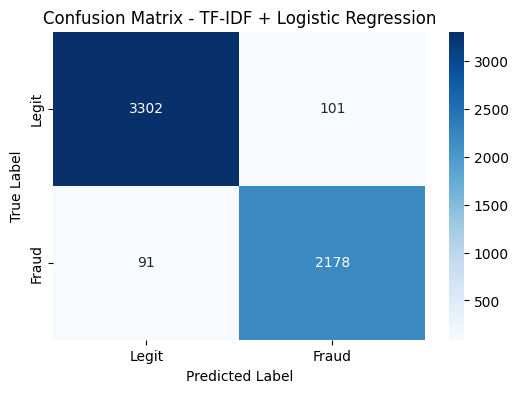

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - TF-IDF + Logistic Regression")
plt.show()

In [ ]:
joblib.dump(clf, 'job_fraud_logistic.joblib')

['job_fraud_logistic.joblib']

In [ ]:
from datasets import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

In [ ]:
class JobDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


train_dataset = JobDataset(train_encodings, list(y_train))
test_dataset = JobDataset(test_encodings, list(y_test))

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
training_args = TrainingArguments(
    output_dir ='../models/distilbert-job-fraud',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    eval_strategy="epoch",
    logging_dir='../logs',
    logging_steps=50,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    group_by_length=False,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.036100,0.022473,0.994006,0.986928,0.998237,0.992550
2,0.011200,0.007767,0.998413,0.996049,1.000000,0.998021
3,0.000200,0.014176,0.997708,0.994303,1.000000,0.997143


TrainOutput(global_step=4254, training_loss=0.0568888985073904, metrics={'train_runtime': 3534.5946, 'train_samples_per_second': 19.253, 'train_steps_per_second': 1.204, 'total_flos': 9014671413338112.0, 'train_loss': 0.0568888985073904, 'epoch': 3.0})

In [ ]:
# Get predictions
predictions = trainer.predict(test_dataset)

preds = predictions.predictions.argmax(-1)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3403
           1       1.00      1.00      1.00      2269

    accuracy                           1.00      5672
   macro avg       1.00      1.00      1.00      5672
weighted avg       1.00      1.00      1.00      5672



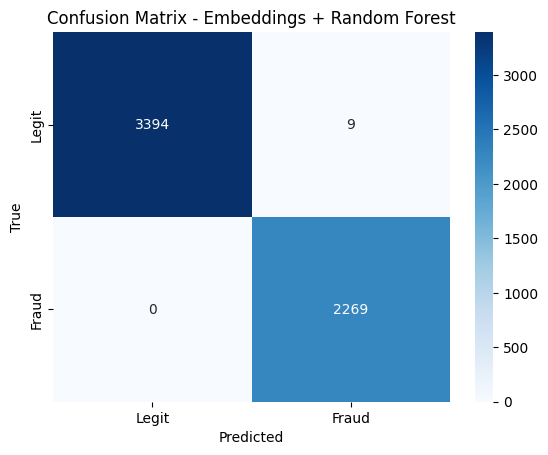

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix - Embeddings + Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
trainer.save_model("fraud_job_distilbert")

In [ ]:
!ls -lh fraud_job_distilbert

total 256M
-rw-r--r-- 1 root root  569 Apr 11 09:53 config.json
-rw-r--r-- 1 root root 256M Apr 11 09:53 model.safetensors
-rw-r--r-- 1 root root 5.2K Apr 11 09:53 training_args.bin


In [ ]:
from transformers import AutoModel

In [ ]:
model = AutoModel.from_pretrained("fraud_job_distilbert")
model.save_pretrained("fraud_job_distilbert", safe_serialization=False)

In [ ]:
!ls

balanced_fake_job_postings.csv	  balanced_fake_job_postings.csv.5
balanced_fake_job_postings.csv.1  fraud_job_distilbert
balanced_fake_job_postings.csv.2  job_fraud_logistic.joblib
balanced_fake_job_postings.csv.3  sample_data
balanced_fake_job_postings.csv.4


In [ ]:
!ls -lh fraud_job_distilbert

total 509M
-rw-r--r-- 1 root root  549 Apr 11 09:53 config.json
-rw-r--r-- 1 root root 256M Apr 11 09:53 model.safetensors
-rw-r--r-- 1 root root 254M Apr 11 09:53 pytorch_model.bin
-rw-r--r-- 1 root root 5.2K Apr 11 09:53 training_args.bin


In [ ]:
tokenizer.save_pretrained("tokenizer")

('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json',
 'tokenizer/tokenizer.json')

In [ ]:
from google.colab import files

In [ ]:
!ls

balanced_fake_job_postings.csv	  balanced_fake_job_postings.csv.4  sample_data
balanced_fake_job_postings.csv.1  balanced_fake_job_postings.csv.5  tokenizer
balanced_fake_job_postings.csv.2  fraud_job_distilbert
balanced_fake_job_postings.csv.3  job_fraud_logistic.joblib


In [ ]:
!ls -lh fraud_job_distilbert

total 509M
-rw-r--r-- 1 root root  549 Apr 11 09:53 config.json
-rw-r--r-- 1 root root 256M Apr 11 09:53 model.safetensors
-rw-r--r-- 1 root root 254M Apr 11 09:53 pytorch_model.bin
-rw-r--r-- 1 root root 5.2K Apr 11 09:53 training_args.bin


In [ ]:
#files.download("fraud_job_distilbert.zip")

In [ ]:
import shutil

In [ ]:
shutil.make_archive('fraud_job_distilbert', 'zip', 'fraud_job_distilbert')

'/content/fraud_job_distilbert.zip'

In [ ]:
shutil.make_archive('tokenizer', 'zip', 'tokenizer')

'/content/tokenizer.zip'

In [ ]:
!ls

balanced_fake_job_postings.csv	  fraud_job_distilbert
balanced_fake_job_postings.csv.1  fraud_job_distilbert.zip
balanced_fake_job_postings.csv.2  job_fraud_logistic.joblib
balanced_fake_job_postings.csv.3  sample_data
balanced_fake_job_postings.csv.4  tokenizer
balanced_fake_job_postings.csv.5  tokenizer.zip


In [ ]:
files.download("fraud_job_distilbert.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("tokenizer.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>